## 🥇 Olympic Medal Prediction

Given *data about Olympic athletes*, let's try to predict whether a given competitor will be a **medal winner** or not.

We will use a Tensorflow ANN to make our predictions.

Data source: https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import classification_report, confusion_matrix

2025-05-28 20:32:03.899473: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
tf.random.set_seed(100)

In [3]:
data = pd.read_csv('athlete_events.csv', nrows=150000)
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,75222,Marsel Markulin,M,23.0,168.0,65.0,Yugoslavia,YUG,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Horse Vault,NaN
149996,75222,Marsel Markulin,M,23.0,168.0,65.0,Yugoslavia,YUG,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Parallel Bars,NaN
149997,75222,Marsel Markulin,M,23.0,168.0,65.0,Yugoslavia,YUG,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Horizontal Bar,NaN
149998,75222,Marsel Markulin,M,23.0,168.0,65.0,Yugoslavia,YUG,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Rings,NaN


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      150000 non-null  int64  
 1   Name    150000 non-null  object 
 2   Sex     150000 non-null  object 
 3   Age     144797 non-null  float64
 4   Height  116259 non-null  float64
 5   Weight  114667 non-null  float64
 6   Team    150000 non-null  object 
 7   NOC     150000 non-null  object 
 8   Games   150000 non-null  object 
 9   Year    150000 non-null  int64  
 10  Season  150000 non-null  object 
 11  City    150000 non-null  object 
 12  Sport   150000 non-null  object 
 13  Event   150000 non-null  object 
 14  Medal   21785 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 17.2+ MB


#### Creating Labels

In [5]:
data['Medal'].unique()

array([nan, 'Gold', 'Bronze', 'Silver'], dtype=object)

In [6]:
data['Medal'] = data['Medal'].apply(lambda x: 1 if str(x) != 'nan' else 0)
data

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,75222,Marsel Markulin,M,23.0,168.0,65.0,Yugoslavia,YUG,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Horse Vault,0
149996,75222,Marsel Markulin,M,23.0,168.0,65.0,Yugoslavia,YUG,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Parallel Bars,0
149997,75222,Marsel Markulin,M,23.0,168.0,65.0,Yugoslavia,YUG,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Horizontal Bar,0
149998,75222,Marsel Markulin,M,23.0,168.0,65.0,Yugoslavia,YUG,1960 Summer,1960,Summer,Roma,Gymnastics,Gymnastics Men's Rings,0


#### Cleaning

In [7]:
data = data.drop(['ID', 'Name', 'Games'], axis=1)

In [8]:
data.isna().mean()

Sex       0.000000
Age       0.034687
Height    0.224940
Weight    0.235553
Team      0.000000
NOC       0.000000
Year      0.000000
Season    0.000000
City      0.000000
Sport     0.000000
Event     0.000000
Medal     0.000000
dtype: float64

In [9]:
data.groupby(['Medal', 'Sex']).mean(numeric_only=True).astype(int)

Age  Height  Weight  Year
Medal Sex                           
0     F     23     167      59  1992
      M     26     178      75  1974
1     F     24     170      62  1991
      M     26     181      79  1966

In [10]:
data.groupby(['Medal', 'Sex'])['Age'].apply(lambda x: x.fillna(x.mean()))

Medal  Sex        
0      F    4         21.0
            5         21.0
            6         25.0
            7         25.0
            8         27.0
                      ... 
1      M    149953    28.0
            149962    20.0
            149963    25.0
            149964    28.0
            149972    23.0
Name: Age, Length: 150000, dtype: float64

In [11]:
for column in ['Age', 'Height', 'Weight']:
    data[column] = data.groupby(['Medal', 'Sex'])['Age'].apply(lambda x: x.fillna(x.mean())).reset_index(drop=True).astype(int)

In [12]:
data.isna().sum()

Sex       0
Age       0
Height    0
Weight    0
Team      0
NOC       0
Year      0
Season    0
City      0
Sport     0
Event     0
Medal     0
dtype: int64

In [13]:
print("Total missing values: ", data.isna().sum().sum())

Total missing values:  0


#### Encoding

In [14]:
data

,Sex,Age,Height,Weight,Team,NOC,Year,Season,City,Sport,Event,Medal
0,M,21,27,27,China,CHN,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,0
1,M,21,27,27,China,CHN,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,0
2,M,25,18,18,Denmark,DEN,1920,Summer,Antwerpen,Football,Football Men's Football,0
3,M,25,18,18,Denmark/Sweden,DEN,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,1
4,F,27,30,30,Netherlands,NED,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,0
...,...,...,...,...,...,...,...,...,...,...,...,...
149995,M,28,23,23,Yugoslavia,YUG,1960,Summer,Roma,Gymnastics,Gymnastics Men's Horse Vault,0
149996,M,20,21,21,Yugoslavia,YUG,1960,Summer,Roma,Gymnastics,Gymnastics Men's Parallel Bars,0
149997,M,25,25,25,Yugoslavia,YUG,1960,Summer,Roma,Gymnastics,Gymnastics Men's Horizontal Bar,0
149998,M,28,29,29,Yugoslavia,YUG,1960,Summer,Roma,Gymnastics,Gymnastics Men's Rings,0


In [15]:
{column: len(data[column].unique()) for column in data.select_dtypes('object').columns}

{'Sex': 2,
 'Team': 1034,
 'NOC': 230,
 'Season': 2,
 'City': 42,
 'Sport': 65,
 'Event': 761}

In [16]:
def binary_encode(df, columns, positive_values):
    df = df.copy()
    for column, positive_value in zip(columns, positive_values):
        df[column] = df[column].apply(lambda x: 1 if x == positive_value else 0)
    return df

In [17]:
def onehot_encode(df, columns, prefixes):
    df = df.copy()
    for column, prefix in zip(columns, prefixes):
        dummies = pd.get_dummies(df[column], prefix=prefix)
        df = pd.concat([df, dummies], axis=1)
        df = df.drop(column, axis=1)
    return df

In [18]:
data = binary_encode(
    data,
    columns=['Sex', 'Season'],
    positive_values = ['M', 'Summer']
)

data = onehot_encode(
    data,
    columns=['Team', 'NOC', 'City', 'Sport', 'Event'],
    prefixes=['T', 'N', 'C', 'S', 'E']
)

In [19]:
print('Remaining non-numeric columns: ', len(data.select_dtypes('object').columns))

Remaining non-numeric columns:  0


In [20]:
data

,Sex,Age,Height,Weight,Year,Season,Medal,T_30. Februar,T_A North American Team,T_Acipactli,...,"E_Wrestling Men's Super-Heavyweight, Greco-Roman","E_Wrestling Men's Unlimited Class, Greco-Roman","E_Wrestling Men's Welterweight, Freestyle","E_Wrestling Men's Welterweight, Greco-Roman","E_Wrestling Women's Featherweight, Freestyle","E_Wrestling Women's Flyweight, Freestyle","E_Wrestling Women's Heavyweight, Freestyle","E_Wrestling Women's Light-Heavyweight, Freestyle","E_Wrestling Women's Lightweight, Freestyle","E_Wrestling Women's Middleweight, Freestyle"
0,1,21,27,27,1992,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,21,27,27,2012,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,25,18,18,1920,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,25,18,18,1900,1,1,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,27,30,30,1988,0,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1,28,23,23,1960,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
149996,1,20,21,21,1960,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
149997,1,25,25,25,1960,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False
149998,1,28,29,29,1960,1,0,False,False,False,...,False,False,False,False,False,False,False,False,False,False


### Visualizing Correlations

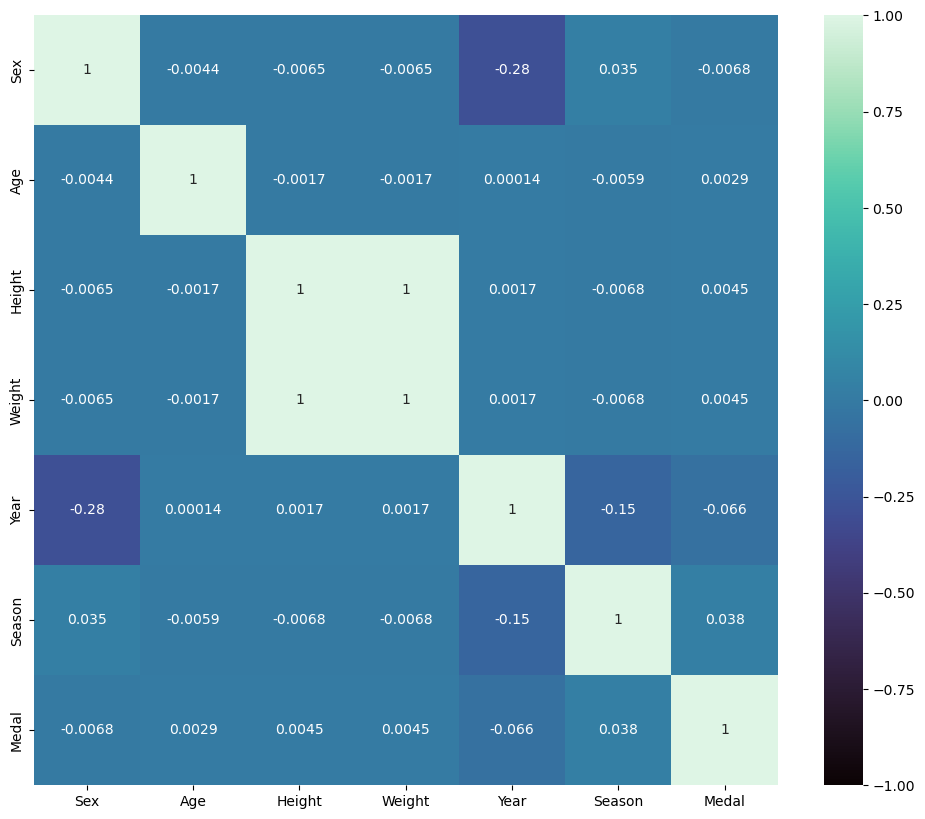

In [21]:
corr = data.loc[:, :'Medal'].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, vmin=-1.0, cmap='mako')
plt.show()

In [22]:
# Removing Weight column due to high correlation
data = data.drop('Weight', axis=1)

In [23]:
data

,Sex,Age,Height,Year,Season,Medal,T_30. Februar,T_A North American Team,T_Acipactli,T_Acturus,...,"E_Wrestling Men's Super-Heavyweight, Greco-Roman","E_Wrestling Men's Unlimited Class, Greco-Roman","E_Wrestling Men's Welterweight, Freestyle","E_Wrestling Men's Welterweight, Greco-Roman","E_Wrestling Women's Featherweight, Freestyle","E_Wrestling Women's Flyweight, Freestyle","E_Wrestling Women's Heavyweight, Freestyle","E_Wrestling Women's Light-Heavyweight, Freestyle","E_Wrestling Women's Lightweight, Freestyle","E_Wrestling Women's Middleweight, Freestyle"
0,1,21,27,1992,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,1,21,27,2012,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,1,25,18,1920,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,1,25,18,1900,1,1,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,0,27,30,1988,0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,1,28,23,1960,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
149996,1,20,21,1960,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
149997,1,25,25,1960,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
149998,1,28,29,1960,1,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


#### Splitting/Scaling

In [24]:
y = data['Medal'].copy()
X = data.drop('Medal', axis=1)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=100)

In [26]:
X_train.shape, X_test.shape

((105000, 2137), (45000, 2137))

In [27]:
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [28]:
X_train = scaler.transform(X_train)

In [29]:
X_test = scaler.transform(X_test)

### Training

In [30]:
print("Class Distribution (Positive to Negative): {:.1f}% / {:.1f}%".format(y_train.mean()*100, (1 - y_train.mean())*100))

Class Distribution (Positive to Negative): 14.5% / 85.5%


In [31]:
inputs = tf.keras.Input(shape=(X.shape[1]))
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
x = tf.keras.layers.Dense(64, activation='relu')(inputs)
outputs = tf.keras.layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.Model(inputs, outputs)

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics = [
        'accuracy',
        tf.keras.metrics.AUC(name='auc')
    ]
)

2025-05-28 20:32:47.683920: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [32]:
history = model.fit(
    X_train, 
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=100,
    callbacks = tf.keras.callbacks.EarlyStopping(
        monitor='val_loss',
        patience=3,
        restore_best_weights = True
    )
)

Epoch 1/100
2625/2625 [==============================] - 24s 8ms/step - loss: 0.4033 - accuracy: 0.8540 - auc: 0.7689 - val_loss: 0.3359 - val_accuracy: 0.8671 - val_auc: 0.8021
Epoch 2/100
2625/2625 [==============================] - 18s 7ms/step - loss: 0.3090 - accuracy: 0.8762 - auc: 0.8376 - val_loss: 0.3216 - val_accuracy: 0.8771 - val_auc: 0.8244
Epoch 3/100
2625/2625 [==============================] - 14s 5ms/step - loss: 0.2913 - accuracy: 0.8863 - auc: 0.8598 - val_loss: 0.3248 - val_accuracy: 0.8825 - val_auc: 0.8302
Epoch 4/100
2625/2625 [==============================] - 15s 6ms/step - loss: 0.2756 - accuracy: 0.8926 - auc: 0.8775 - val_loss: 0.3458 - val_accuracy: 0.8875 - val_auc: 0.8400
Epoch 5/100
2625/2625 [==============================] - 20s 8ms/step - loss: 0.2603 - accuracy: 0.8981 - auc: 0.8933 - val_loss: 0.3869 - val_accuracy: 0.8908 - val_auc: 0.8420


### Results

In [33]:
model.evaluate(X_test, y_test)

1407/1407 [==============================] - 5s 3ms/step - loss: 0.3160 - accuracy: 0.8771 - auc: 0.8315


[0.3159979283809662, 0.8770889043807983, 0.831537663936615]

In [35]:
y_true = np.array(y_test)
y_pred = np.squeeze(np.array(model.predict(X_test) >= 0.5, dtype=int))

1407/1407 [==============================] - 6s 4ms/step


In [36]:
print("Classification Report: \n\n", classification_report(y_true, y_pred))

Classification Report: 

               precision    recall  f1-score   support

           0       0.89      0.98      0.93     38473
           1       0.70      0.27      0.39      6527

    accuracy                           0.88     45000
   macro avg       0.79      0.63      0.66     45000
weighted avg       0.86      0.88      0.85     45000



In [37]:
print("Confusion Matrix: \n\n", confusion_matrix(y_true, y_pred))

Confusion Matrix: 

 [[37700   773]
 [ 4758  1769]]
